# Reproducing arXiv:2108.01039 with scikit-qulacs

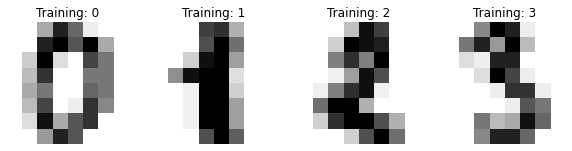

In [1]:
# This part is taken from https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

## Prepare dataset
Flatten images to make them 1-dimenstional vectors and split the dataset into test and trainign

In [7]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
# split them into test and train
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, train_size=0.72, shuffle=True
)

## Prepare an NPQC ansatz
Create circuit from pre-defined set. scikit-qulacs can create the ansatz called NPQC ansatz in arXiv:2108.01039.

In [5]:
from skqulacs.qsvm import QSVC
from skqulacs.circuit import create_npqc_ansatz

n_qubit = 8
n_layers = 8
c = 0.035 # hyperparameter determining the kernel sharpness for the NPQC ansatz
circuit = create_npqc_ansatz(n_qubit, 8, c)

## Kernel SVM using the ansatz
Train the kernel support vector machine and make prediction

In [8]:
from skqulacs.qsvm import QSVC
from skqulacs.circuit import create_npqc_ansatz

clf = QSVC(circuit)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score
print("test accuracy is:", accuracy_score(y_test, predicted))

test accuracy is: 0.9722222222222222


## Showing results
See image and prediction for some of the test data

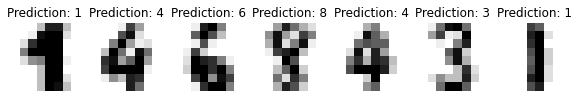

In [10]:
_, axes = plt.subplots(nrows=1, ncols=7, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

Confusion matrix

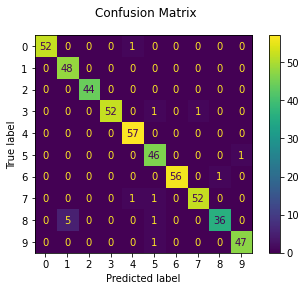

In [12]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

## Reproduce Fig. 4(a) of arXiv:2108.01039

We vary the training dataset size and see how the test accuracy changes. The code below takes some time to execute.

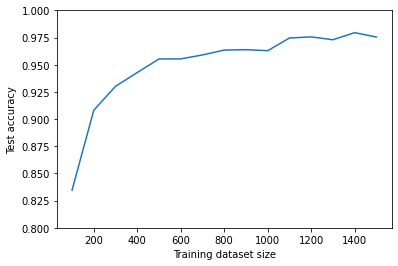

In [13]:
from skqulacs.qsvm import QSVC
from skqulacs.circuit import create_npqc_ansatz
from sklearn.metrics import accuracy_score

acc_list=[]

for trainsize in range(100,1501,100):
    acc_list.append(0.0)
    n_qubit=8
    circuit = create_npqc_ansatz(n_qubit,8,0.035)
    clf = QSVC(circuit)

    X_train, X_test, y_train, y_test = train_test_split(
        data, digits.target, train_size=trainsize, shuffle=True
    )

    clf.fit(X_train, y_train)

    predicted = clf.predict(X_test)
    acc_list[-1]=accuracy_score(y_test, predicted)

plt.plot(range(100,1501,100),acc_list)
plt.xlabel("Training dataset size")
plt.ylabel("Test accuracy")
plt.ylim(0.8,1.0)
plt.show()
